### Load Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid',font_scale=1.3)

### Load Data

In [6]:
df = pd.read_csv('../data/train.csv',index_col=0, parse_dates=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [7]:
# check missing values
df.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### Data Preprocessing

#### Extract time features

In [13]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.weekday
df['hour'] = df.index.hour
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,5,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,5,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,5,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,5,4


### Exploratory Data Analysis

In [55]:
df[['casual','registered']]

,casual,registered
datetime,,
2011-01-01 00:00:00,3,13
2011-01-01 01:00:00,8,32
2011-01-01 02:00:00,5,27
2011-01-01 03:00:00,3,10
2011-01-01 04:00:00,0,1
...,...,...
2012-12-19 19:00:00,7,329
2012-12-19 20:00:00,10,231
2012-12-19 21:00:00,4,164


#### Correlation Analysis of Features

<AxesSubplot:>

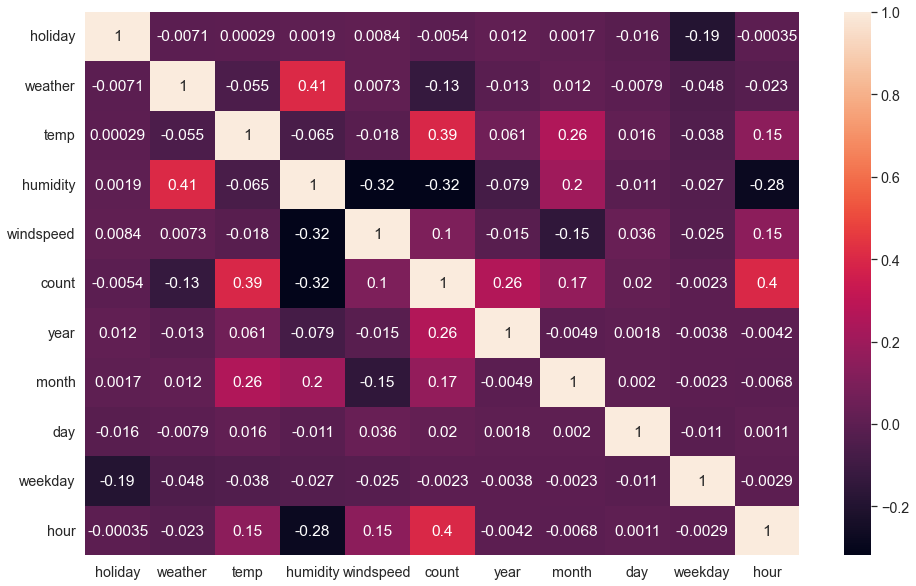

In [83]:
df.head()
plt.figure(figsize=(16,10))
corr = df.drop(['casual','registered'],axis=1).corr()
sns.heatmap(corr, annot=True)

There is high correlation between ```month``` and ```season```, ```weekday ``` and ```workking day```, ```temp``` and ```atemp```

Therefore we can drop ``` workingday```, ```season``` and ```atemp```  

In [63]:
# Drop 'workingday', 'season', and 'atemp' 
df.drop(['workingday', 'season', 'atemp'], axis = 1, inplace = True)

#### Analyze average of counts per time 

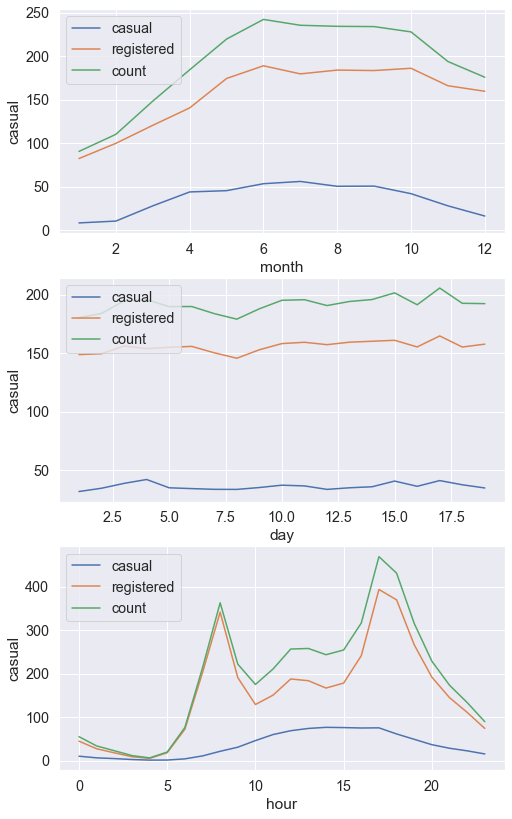

In [84]:
fig, ax = plt.subplots(3, 1, figsize=(8, 14))
ax = ax.flatten() 
features = ['month','day','hour']
for index,feature in enumerate(features):
        
        sns.lineplot(ax=ax[index],x=feature,y='casual',data=df.groupby(feature)['casual'].mean().reset_index(),label ='casual')
        sns.lineplot(ax=ax[index],x=feature,y='registered',data=df.groupby(feature)['registered'].mean().reset_index(),label= 'registered')
        sns.lineplot(ax=ax[index],x=feature,y='count',data=df.groupby(feature)['count'].mean().reset_index(),label = 'count')
        ax[index].legend(loc='upper left')
